In [19]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

file= "Resources/alldata.csv"

In [20]:
#read dataframe
df = pd.read_csv(file)
df.count()

position       6953
company        6953
description    6953
reviews        5326
location       6953
dtype: int64

In [21]:
# Drop reviews column
del df['reviews']

In [22]:
# Drop records where there are any NA
df=df.dropna(how='all')
df.count()

position       6953
company        6953
description    6953
location       6953
dtype: int64

In [23]:
# Create a clean location column
df['location'] = df['location'].str.replace(r'\d+','')
df['location'] = df['location'].str.strip()
# df

In [24]:
# Running our 'query' through the position column, marking found words as true
try:
  df = df.rename(columns={"positiontxt":"position"})
  df['position'] = df[df['position'].str.contains('data|science|database|analytics|statistician|machine learning|business intelligence',
                                                  flags=re.IGNORECASE, regex=True)]
except AttributeError:
  print("stupid error makes no sense")

# df.count()

In [25]:
df = df.dropna(how='any')
df['position']

In [26]:
newdf = df[['company', 'position']].copy()
newdf['Counts'] = df.groupby(['company'])['position'].transform('count')

newdfclean = newdf.drop(newdf[newdf.Counts < 33].index)
newdfclean
newdfclean.loc[df.position.str.contains('analyst', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('analysis', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('analytics', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('machine learning', case=False), 'Job Type'] = 'Machine Learning'
newdfclean.loc[df.position.str.contains('engineering', case=False), 'Job Type'] = 'Engineer'
newdfclean.loc[df.position.str.contains('engineer', case=False), 'Job Type'] = 'Engineer'
newdfclean.loc[df.position.str.contains('data science', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('data scientist', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('applied scientist', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('applied science', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('sales', case=False), 'Job Type'] = 'Business Intelligence'
newdfclean.loc[df.position.str.contains('business intelligence', case=False), 'Job Type'] = 'Business Intelligence'

newdfclean.sort_values('Counts', ascending=False)

,company,position,Counts,Job Type
3877,Amazon.com,Sr. Data Engineer,157,Engineer
4979,Amazon.com,"Data Scientist, Alexa Shopping NLU",157,Data Scientist
5643,Amazon.com,Applied Science Manager - Deep Learning,157,Data Scientist
5641,Amazon.com,"Science Manager, Alexa Machine Learning",157,Machine Learning
5638,Amazon.com,Sr Machine Learning Scientist - Prime Video Re...,157,Machine Learning
5627,Amazon.com,"Sr. Machine Learning Scientist, Amazon Alexa",157,Machine Learning
5623,Amazon.com,"Data Engineering Manager, Amazon Go",157,Engineer
5620,Amazon.com,Senior Data Engineer,157,Engineer
5615,Amazon.com,Sr Machine Learning Scientist - Prime Video Re...,157,Machine Learning
4947,Amazon.com,Machine Learning Scientist,157,Machine Learning


In [27]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


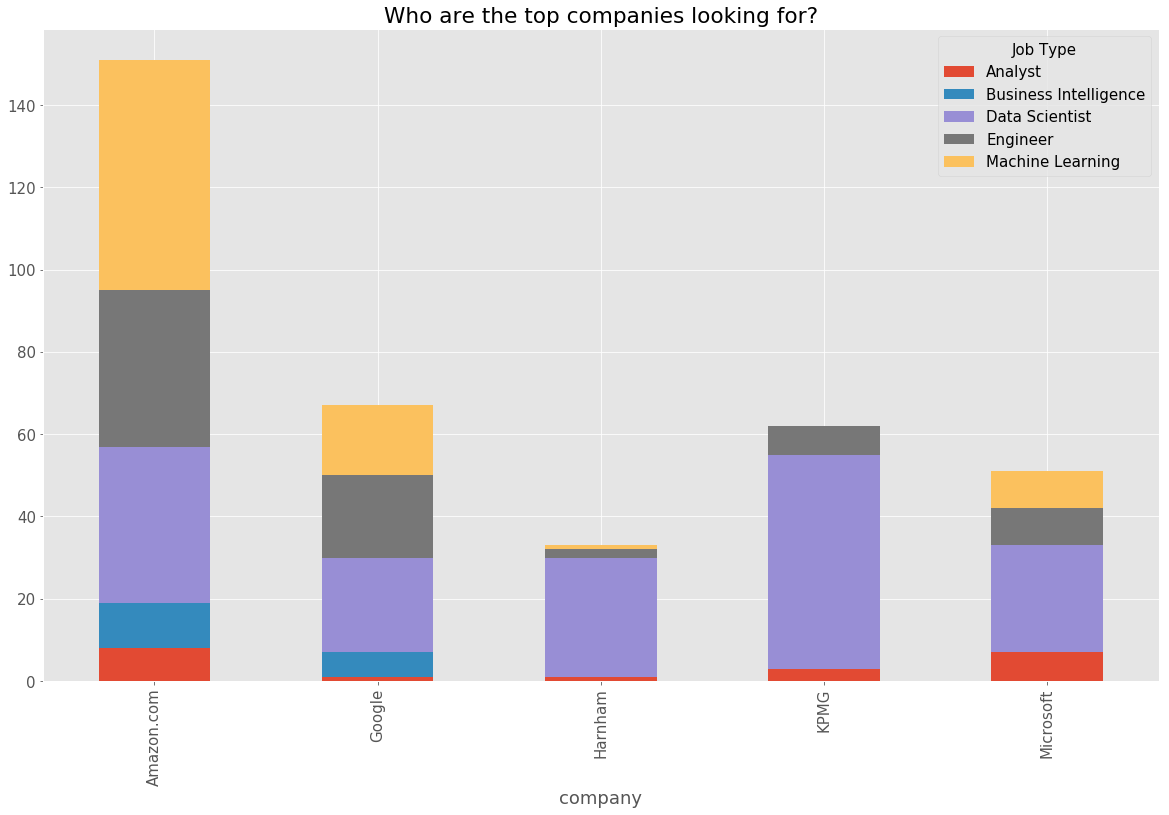

In [28]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15})
plt.cm.BuPu(np.linspace(0, 0.5))
bplot= newdfclean.groupby(['company', 'Job Type']).size().unstack()

bplot.plot(kind='bar',stacked=True, figsize=(20,12), title="Who are the top companies looking for?")

plt.savefig('Images/topcompanyjobs.png')

In [30]:
# Get the state
state = df["location"].str.split(",", n = 1, expand = True)
df['state'] = state[1]
df.head()

,position,company,description,location,state
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,"Atlanta, GA",GA
9,Senior Associate - Cognitive Data Scientist Na...,KPMG,Known for being a great place to work and buil...,"Atlanta, GA",GA


In [31]:
# Dependencies to use the Google API for heatmaps
import requests
import json
import gmaps
from config import gkey
gmaps.configure(api_key=gkey)

In [32]:
# Create a new df with only the distinct locations and include a column for longitude and latitude
distinct_locations_df = df[["location","state"]]
distinct_locations_df["longitude"]=""
distinct_locations_df["latitude"]=""
distinct_locations_df = distinct_locations_df.drop_duplicates(keep='first', inplace=False)
distinct_locations_df

/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,location,state,longitude,latitude
2,"Atlanta, GA",GA,,
270,"Austin, TX",TX,,
281,"Round Rock, TX",TX,,
493,"Boulder, CO",CO,,
744,"Boston, MA",MA,,
1371,"Chicago, IL",IL,,
1842,"Washington, DC",DC,,
2189,"Los Angeles, CA",CA,,
2438,"Cambridge, MA",MA,,
3131,"Mountain View, CA",CA,,


In [33]:
# Iterate through the distinct locations dataframe and get the longitude and latitude
# After getting the long and lat, add to the DF
for index, row in distinct_locations_df.iterrows():
    target_city = row["location"]
    # Build the endpoint URL
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, gkey)
    geo_data = requests.get(target_url).json()
    try:
        distinct_locations_df.loc[index, 'longitude'] = geo_data["results"][0]["geometry"]["location"]["lat"]
        distinct_locations_df.loc[index, 'latitude'] = geo_data["results"][0]["geometry"]["location"]["lng"]
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

In [34]:
# Set the location column as the index 
distinct_locations_df = distinct_locations_df.set_index("location")

In [35]:
# Get the number of times a location popped up (using the original dataframe)
weights_group = df.groupby(["location"])
weights = weights_group["location"].count()

# Create a new column in the distinct locations dataframe for number of instances
distinct_locations_df["Number of Job Postings"] = weights
distinct_locations_df

,state,longitude,latitude,Number of Job Postings
location,,,,
"Atlanta, GA",GA,33.749,-84.388,108
"Austin, TX",TX,30.2672,-97.7431,80
"Round Rock, TX",TX,30.5083,-97.6789,3
"Boulder, CO",CO,40.015,-105.271,25
"Boston, MA",MA,42.3601,-71.0589,227
"Chicago, IL",IL,41.8781,-87.6298,204
"Washington, DC",DC,38.9072,-77.0369,120
"Los Angeles, CA",CA,34.0522,-118.244,74
"Cambridge, MA",MA,42.3736,-71.1097,134


In [36]:
# Store latitude and longitude in locations
locations = distinct_locations_df[["longitude","latitude"]]

# Convert the Number of Instances column to float so that it can be used as weights in the DF
weights = distinct_locations_df["Number of Job Postings"].astype(float)

In [37]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights = weights,
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)
# Add layer
fig.add_layer(heat_layer)

# Display the figure
fig

Figure(layout=FigureLayout(height='420px'))

In [38]:
# Group the data by state and get postings by state
state_groups = distinct_locations_df.groupby(["state"])
total_listings = state_groups.sum()
total_listings= total_listings.reset_index()
total_listings = total_listings.sort_values("Number of Job Postings", ascending = False)
total_listings

,state,Number of Job Postings
0,CA,909
7,NY,534
5,MA,361
9,WA,358
4,IL,204
2,DC,120
3,GA,108
8,TX,83
6,NJ,37
1,CO,25


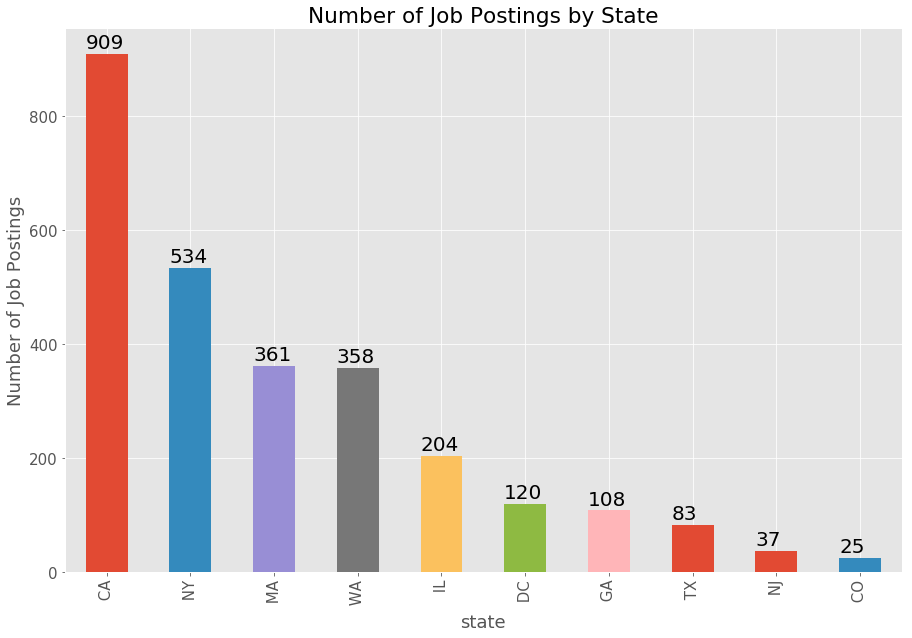

In [39]:
# Create a bar chart
ax = total_listings.plot.bar(x="state", y="Number of Job Postings", 
                        title = "Number of Job Postings by State", align="center",legend=False, figsize=(15,10))
plt.ylabel("Number of Job Postings")

totals = []
for p in ax.patches:
   ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() + 10), fontsize = 20) 

# Show and save chart
plt.savefig('Images/jobpostingsbystatebarchart.png', bbox_inches = 'tight')

In [40]:
# Import Dependencies for tokenize
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/lauren/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
# Takes description column and makes it one large string
all_job_description = ""
for job in df['description']:
    all_job_description += " " + job


In [42]:
# Lower case job description and tokenize
all_job_description_l = all_job_description.lower()
tokens = word_tokenize(str(all_job_description_l))

In [43]:
# Function returns a count of the keyword
def countkeywords(keyword,text):
    return keyword, text.count(keyword)

In [44]:
# Define word list
skillsNeeded = ['python', 'r', 'sql', 'hadoop', 'spark', 'java', 'tableau', 'hive',
               'scala', 'aws', 'c++', 'matlab', 'tensorflow', 'c', 'excel', 'nosql', 'linux',
               'azure','scikit-learn']

# Create empty list of keywords, which will be a list that is appended from the list skillsNeeded
# Creat empty list that stores the count of each of the skills
keywords = []
skill_word_count = []

# Loops through each skill in skill list, and returns a count for each of them in job description
for keyword in skillsNeeded:
    keywords.append(countkeywords(keyword,tokens)[0])
    skill_word_count.append(countkeywords(keyword,tokens)[1])

# Create dataframe of count of skills  
word_count_df = pd.DataFrame({"language": keywords,
                            "count":skill_word_count})
word_count_df

,language,count
0,python,2343
1,r,1591
2,sql,1525
3,hadoop,789
4,spark,909
5,java,819
6,tableau,410
7,hive,429
8,scala,440
9,aws,665


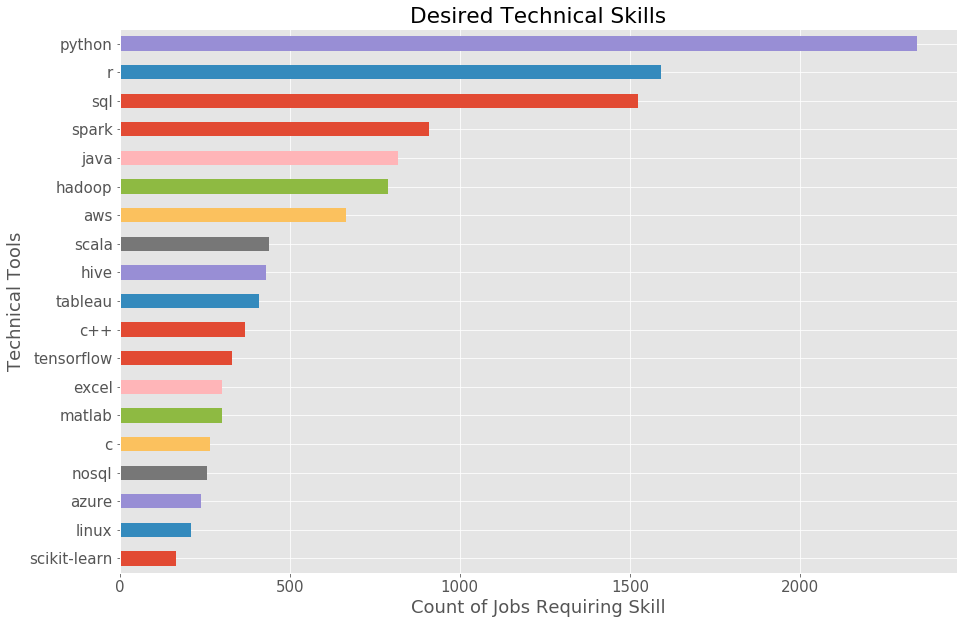

In [45]:
# Create Bar Chart for words
word_count_df = word_count_df.sort_values('count')
word_count_df.plot.barh(x="language", y="count", title = "Desired Technical Skills", align="center",legend=False, figsize=(15, 10))
plt.xlabel("Count of Jobs Requiring Skill")
plt.ylabel("Technical Tools")

plt.savefig('Images/language_count.jpg')

In [46]:
# Makes description column lower case. Not tokenized.
df['description2'] = df['description'].str.lower()

# Create columns that returns boolean if job description contains exact strings specified
df['bs'] = df['description2'].str.contains(r'\b(ba|b.a.|b.a|ba.|bs|b.s.|b.s|bs.|bachelors|bachelor)\b', 
                                           flags=re.IGNORECASE, regex=True)
df['msbs'] = df['description2'].str.contains(r'\b(ma|m.a.|ma.|ms|m.s.|m.s|ms.|masters|master|ba|b.a.|b.a|ba.|bs|b.s.|b.s|bs.|bachelors|bachelor)\b', 
                                             flags=re.IGNORECASE, regex=True)
df['phdmsbs'] = df['description2'].str.contains(r'\b(doctorate|d.r.|dr.|d.r|phd|ph.d|ph.d.|md|m.d.|m.d|md.|ma|m.a.|ma.|ms|m.s.|m.s|ms.|masters|master|ba|b.a.|b.a|ba.|bs|b.s.|b.s|bs.|bachelors|bachelor)\b', 
                                                flags=re.IGNORECASE, regex=True)
# Counter for each degree
bsCounter = 0
msbsCounter = 0
phdmsbsCounter = 0

# Loops through column and adds to counter for those that return True
for row in df['bs']:
    if row == True:
        bsCounter +=1

for row in df['msbs']:
    if row == True:
        msbsCounter +=1

for row in df['phdmsbs']:
    if row == True:
        phdmsbsCounter +=1

# In order to attain the count of only masters degrees, we need to subtract those descriptions that contain bachelors
msCounter = msbsCounter - bsCounter

# In order to attain the count of only doctorate degrees, we need to subtract those descriptions that contain bachelors and masters
phdCounter = phdmsbsCounter - msbsCounter

/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.
/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if sys.path[0] == '':


In [47]:
# Just to compare how many listings we captured mentioning degrees:
# Out of all descriptions almost 94% required degrees.
# The rest either does not mention these keywords, or may have used some other abbreviation we did not account for.
phdmsbsCounter/len(df['description'])

0.9386637458926615

In [48]:
# Same as column above, but only for grad degrees (masters and doctorate)
df['phdms'] = df['description2'].str.contains(r'\b(doctorate|d.r.|dr.|d.r|phd|ph.d|ph.d.|ma|m.a.|ma.|ms|m.s.|m.s|ms.|masters|master)\b', 
                                             flags=re.IGNORECASE, regex=True)
# Create counter for grad degrees
gradCounter = 0

# Loops through column and adds to counter for those that return True
for row in df['phdms']:
    if row == True:
        gradCounter +=1

# To attain number of jobs that prefer a graduate degree, take count of listings thast mention grad degrees and subtract that from total number of listings that mention any degree
undergradCounter = phdmsbsCounter - gradCounter

/Users/lauren/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [49]:
# Create dataframes
degreeList = ['Bachelors', 'Masters', 'Doctorate']
degreeCount = [bsCounter, msCounter, phdCounter]
degreeRequiredDF = pd.DataFrame({"Degree":degreeList, "Count": degreeCount})

degreeList2 = ['Undergraduate', 'Graduate']
degreeCount2 = [undergradCounter, gradCounter]
degreePreferred = pd.DataFrame({"Degree":degreeList2, "Count": degreeCount2})

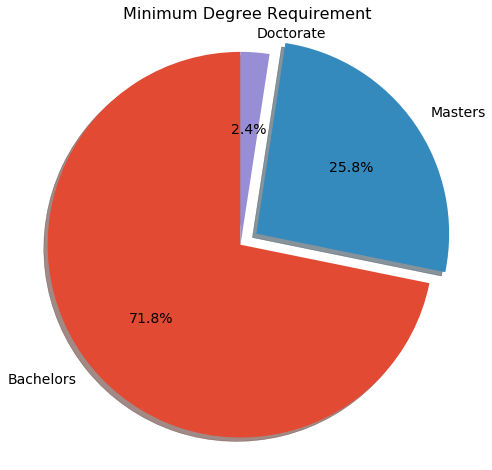

In [50]:
# Build Pie Chart
labels = ["Bachelors", "Masters", "Doctorate"]
explode= (0, 0.1, 0)
plt.pie(degreeCount, explode=explode, labels=labels, 
        autopct="%1.1f%%", shadow=True, startangle = 90, textprops={'fontsize': 14})
plt.title('Minimum Degree Requirement',fontsize = 16)
plt.axis("equal")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.savefig("Images/degreereq.png")
plt.show()

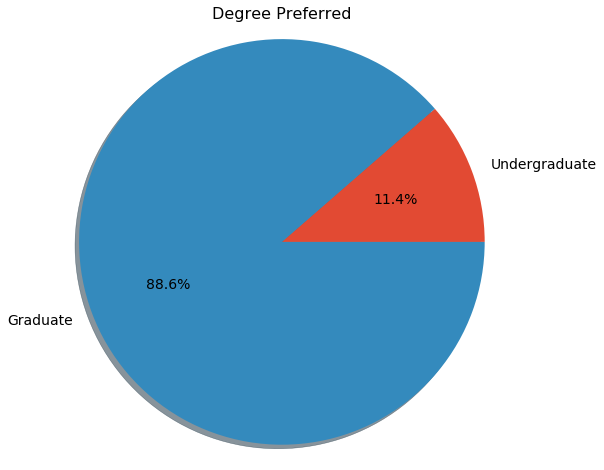

In [51]:
# Build Pie Chart
labels = ["Undergraduate", "Graduate"]

plt.pie(degreeCount2, labels=labels, autopct="%1.1f%%", shadow=True, textprops={'fontsize': 14})
plt.title('Degree Preferred', fontsize = 16)
plt.axis("equal")

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.savefig("Images/degreerpref.png")
plt.show()